# Overview and Statistics of Kickstarter Projects

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
data = pd.read_csv('ks-projects-201801.csv')
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Add and Drop Columns

In [4]:
#change string to date for the sake of getting day, month etc.
from datetime import datetime
def countDays(row):
    date_format = "%Y-%m-%d"
    a = datetime.strptime(row["launched"][:10], date_format)
    b = datetime.strptime(row["deadline"], date_format)
    delta = b - a
    return delta.days

In [5]:
data['launch_month'] = pd.DatetimeIndex(data['launched']).month #1 = January
data['launch_day'] = pd.DatetimeIndex(data['launched']).weekday #0 = monday
data['weekday'] = pd.DatetimeIndex(data['launched']).day_name()
data['month'] = pd.DatetimeIndex(data['launched']).month_name()


data["days"] = data.apply(countDays, axis=1)

data = data.drop(['name','category','deadline','pledged','usd pledged','goal','usd_pledged_real','launched','backers'], 1)

data.head()

,ID,main_category,currency,state,country,usd_goal_real,launch_month,launch_day,weekday,month,days
0,1000002330,Publishing,GBP,failed,GB,1533.95,8,1,Tuesday,August,59
1,1000003930,Film & Video,USD,failed,US,30000.00,9,5,Saturday,September,60
2,1000004038,Film & Video,USD,failed,US,45000.00,1,5,Saturday,January,45
3,1000007540,Music,USD,failed,US,5000.00,3,5,Saturday,March,30
4,1000011046,Film & Video,USD,canceled,US,19500.00,7,5,Saturday,July,56


## Looking at state distribution

In [6]:
#State distribution by count
stateDistri = data[['state','ID']]
stateDistri = stateDistri.groupby(["state"],as_index = False).agg(['count'])
stateDistri.columns = ['count']

# reset index to get grouped columns back
stateDistri = stateDistri.reset_index()

labels = stateDistri.state.unique()
#stateDistri = stateDistri.sort_values(by=['count'])

b, c = stateDistri.iloc[0].copy(), stateDistri.iloc[5].copy()
stateDistri.iloc[0],stateDistri.iloc[5] = c,b

stateDistri


,state,count
0,undefined,3562
1,failed,197719
2,live,2799
3,successful,133956
4,suspended,1846
5,canceled,38779


## Diagrams

### State

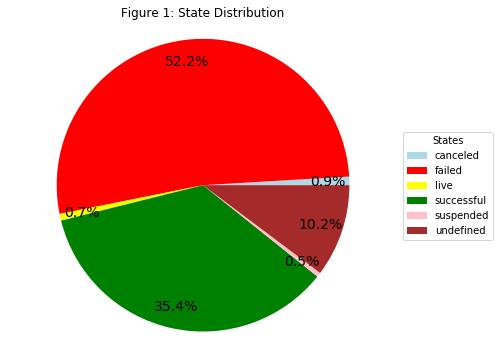

In [7]:
#Plot of distribution
fig1, ax = plt.subplots(figsize=(7, 6))

wedges, texts, autotexts = ax.pie(stateDistri['count'], autopct='%1.1f%%',textprops={'fontsize': 14}, pctdistance=0.85,
                                 radius=1.5, colors=['lightblue','red','yellow','green','pink','brown'])

ax.legend(wedges, labels,
          title="States",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1))

ax.set_title("Figure 1: State Distribution");
ax.axis('equal')
plt.show()

In [8]:
#Dropping smaller states, we only want to look at sucess/failed
#We also set the color
dfCount = data.loc[:, data.columns.intersection(['state','ID'])]
FailedSuccess = dfCount.groupby(['state']).agg(['count'])
FailedSuccess.columns = FailedSuccess.columns.droplevel()

FailedSuccess = FailedSuccess.drop(["canceled","live","suspended","undefined"])
FailedSuccess['color'] = np.where(FailedSuccess.index=='successful', 'green', 'red')

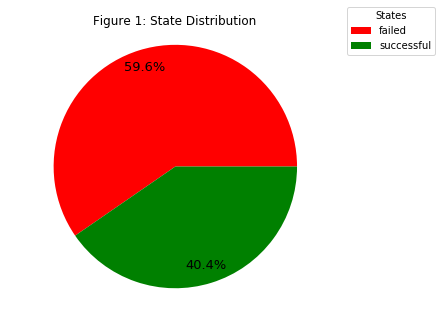

In [9]:
fig2, ax2 = plt.subplots(figsize=(6, 5))

wedges, texts, autotexts = ax2.pie(FailedSuccess['count'], autopct='%1.1f%%',textprops={'fontsize': 13}, pctdistance=0.85,
                                 radius=1.5, colors = FailedSuccess['color'])

ax2.legend(wedges, FailedSuccess.index,
          title="States",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 2))

ax2.set_title("Figure 1: State Distribution");
ax2.axis('equal')
plt.show()

### Month

In [10]:
bymonth = data[['launch_month','ID']]
bymonth = bymonth.groupby(["launch_month"],as_index = False).agg(['count'])

bymonth.columns = ['count']
bymonth = bymonth.reset_index()

bymonth

,launch_month,count
0,1,27841
1,2,29732
2,3,33946
3,4,32260
4,5,32888
5,6,32623
6,7,36367
7,8,32291
8,9,31069
9,10,33490


### One-hot encoding

In [11]:
hotdata = data.copy()
one_hot = pd.get_dummies(data['state'])
hotdata = hotdata.join(one_hot)

hotdata = hotdata.drop('undefined',1)
hotdata = hotdata.drop('live',1)
hotdata = hotdata.drop('suspended',1)
hotdata = hotdata.drop('canceled',1)

one_hot = pd.get_dummies(data['main_category'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(data['currency'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(data['country'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(data['weekday'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(data['month'])
hotdata = hotdata.join(one_hot)

hotdata.head()

,ID,main_category,currency,state,country,usd_goal_real,launch_month,launch_day,weekday,month,...,December,February,January,July,June,March,May,November,October,September
0,1000002330,Publishing,GBP,failed,GB,1533.95,8,1,Tuesday,August,...,0,0,0,0,0,0,0,0,0,0
1,1000003930,Film & Video,USD,failed,US,30000.00,9,5,Saturday,September,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Film & Video,USD,failed,US,45000.00,1,5,Saturday,January,...,0,0,1,0,0,0,0,0,0,0
3,1000007540,Music,USD,failed,US,5000.00,3,5,Saturday,March,...,0,0,0,0,0,1,0,0,0,0
4,1000011046,Film & Video,USD,canceled,US,19500.00,7,5,Saturday,July,...,0,0,0,1,0,0,0,0,0,0


### Per month, Failed/Success

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


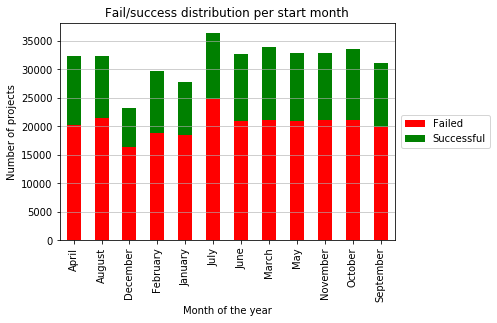

In [12]:
df2 = hotdata.groupby(['month', 'successful'])['month'].count().unstack('successful').fillna(0)
df2[[0,1]].plot(kind='bar', stacked=True, colors=['red','green'])
plt.ylabel('Number of projects')
plt.xlabel('Month of the year')
plt.legend(['Failed','Successful'], loc='right', bbox_to_anchor=(1.3, 0, 0, 1))
plt.title('Fail/success distribution per start month')
plt.grid(axis='y', alpha=0.75)

### Categories

In [13]:
catdata = hotdata[['main_category','ID']]
catdata = catdata.groupby(["main_category"],as_index = False).agg(['count'])

catdata.columns = ['count']
catdata = catdata.reset_index()
catdata

,main_category,count
0,Art,28153
1,Comics,10819
2,Crafts,8809
3,Dance,3768
4,Design,30070
5,Fashion,22816
6,Film & Video,63585
7,Food,24602
8,Games,35231
9,Journalism,4755


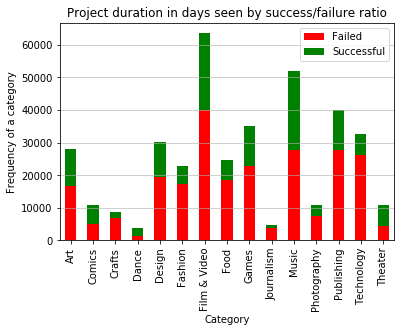

In [25]:
df3 = hotdata.groupby(['main_category', 'successful'])['main_category'].count().unstack('successful').fillna(0)
df3[[0,1]].plot(kind='bar', stacked=True, colors=['red','green'])

plt.ylabel('Frequency of a category')
plt.xlabel('Category')
plt.legend(['Failed','Successful'])

plt.title('Project duration in days seen by success/failure ratio')
plt.grid(axis='y', alpha=0.75)

# Category stats
## numerical and percentage

In [26]:
df3.columns = ['failed', 'success']
df3 = df3.reset_index()
df3

,main_category,failed,success
0,Art,16643,11510
1,Comics,4977,5842
2,Crafts,6694,2115
3,Dance,1430,2338
4,Design,19520,10550
5,Fashion,17223,5593
6,Film & Video,39962,23623
7,Food,18517,6085
8,Games,22713,12518
9,Journalism,3743,1012


In [29]:
#percentage
def convert(row):
    return ((row['failed'])/(row['failed']+row['success'])*100)

### Percentage failed per category

In [31]:
#ratio of failed/success %

df3['failed'] = df3['failed'].astype(float)
df3['success'] = df3['success'].astype(float)
df3['ratio'] = df3.apply(convert, axis=1)
df3

,main_category,failed,success,ratio
0,Art,16643.0,11510.0,59.116258
1,Comics,4977.0,5842.0,46.002403
2,Crafts,6694.0,2115.0,75.990464
3,Dance,1430.0,2338.0,37.951168
4,Design,19520.0,10550.0,64.915198
5,Fashion,17223.0,5593.0,75.486501
6,Film & Video,39962.0,23623.0,62.848156
7,Food,18517.0,6085.0,75.266239
8,Games,22713.0,12518.0,64.468792
9,Journalism,3743.0,1012.0,78.717140


## Weekdays

In [32]:
df2 = hotdata.groupby(['weekday', 'successful'])['weekday'].count().unstack('successful').fillna(0)
df2.columns = ['failed','success'] 
df2 = df2.reset_index()


# reordering the columns to get normal order
b, c = df2.iloc[0].copy(), df2.iloc[1].copy()
df2.iloc[0],df2.iloc[1] = c,b

b, c = df2.iloc[1].copy(), df2.iloc[5].copy()
df2.iloc[1],df2.iloc[5] = c,b

b, c = df2.iloc[2].copy(), df2.iloc[6].copy()
df2.iloc[2],df2.iloc[6] = c,b

b, c = df2.iloc[3].copy(), df2.iloc[4].copy()
df2.iloc[3],df2.iloc[4] = c,b

b, c = df2.iloc[4].copy(), df2.iloc[5].copy()
df2.iloc[4],df2.iloc[5] = c,b

b, c = df2.iloc[5].copy(), df2.iloc[6].copy()
df2.iloc[5],df2.iloc[6] = c,b
df2

,weekday,failed,success
0,Monday,39467,21761
1,Tuesday,48520,28787
2,Wednesday,43405,24033
3,Thursday,39231,21365
4,Friday,38404,19923
5,Saturday,22023,10694
6,Sunday,13655,7393


### Weekdays succes/failed

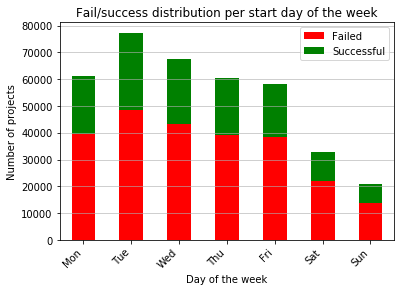

In [34]:
#Project weekday start compared with fail/succes
df2[['failed','success']].plot(kind='bar', stacked=True, colors=['red','green'])
plt.ylabel('Number of projects')
plt.xlabel('Day of the week')
plt.legend(['Failed','Successful'])
#plt.xticks(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

locs, labels=plt.xticks()
x_ticks = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(locs,x_ticks, rotation=45, horizontalalignment='right')

plt.title('Fail/success distribution per start day of the week')
plt.grid(axis='y', alpha=0.75)

## Length vs success/failed ratio

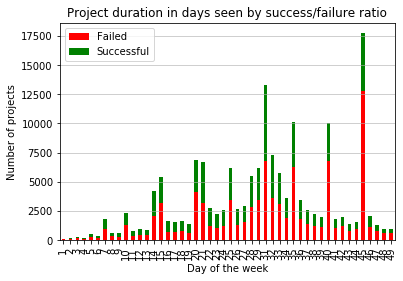

In [38]:
binned = hotdata
binned = binned[hotdata.days < 50]
binned = binned[binned.days != 30]


df3 = binned.groupby(['days', 'successful'])['days'].count().unstack('successful').fillna(0)
df3[[0,1]].plot(kind='bar', stacked=True, colors=['red','green'])
plt.ylabel('Number of projects')
plt.xlabel('Day of the week')
plt.legend(['Failed','Successful'])

plt.title('Project duration in days seen by success/failure ratio')
plt.grid(axis='y', alpha=0.75)

In [928]:
hotdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
ID               378661 non-null int64
main_category    378661 non-null object
currency         378661 non-null object
state            378661 non-null object
country          378661 non-null object
usd_goal_real    378661 non-null float64
launch_month     378661 non-null int64
launch_day       378661 non-null int64
weekday          378661 non-null object
failed           378661 non-null uint8
successful       378661 non-null uint8
color            378661 non-null object
dtypes: float64(1), int64(3), object(6), uint8(2)
memory usage: 29.6+ MB


In [39]:
hotdata = data.copy()
one_hot = pd.get_dummies(data['state'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(data['main_category'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(data['currency'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(daya['country'])
hotdata = hotdata.join(one_hot)

one_hot = pd.get_dummies(data['weekday'])
hotdata = hotdata.join(one_hot)

hotdata.head()

NameError: name 'daya' is not defined

In [672]:
hotdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 74 columns):
ID               378661 non-null int64
main_category    378661 non-null object
currency         378661 non-null object
state            378661 non-null object
country          378661 non-null object
usd_goal_real    378661 non-null float64
launch_month     378661 non-null int64
launch_day       378661 non-null int64
weekday          378661 non-null object
canceled         378661 non-null uint8
failed           378661 non-null uint8
live             378661 non-null uint8
successful       378661 non-null uint8
suspended        378661 non-null uint8
undefined        378661 non-null uint8
Art              378661 non-null uint8
Comics           378661 non-null uint8
Crafts           378661 non-null uint8
Dance            378661 non-null uint8
Design           378661 non-null uint8
Fashion          378661 non-null uint8
Film & Video     378661 non-null uint8
Food             378661 

###  NOT USED!

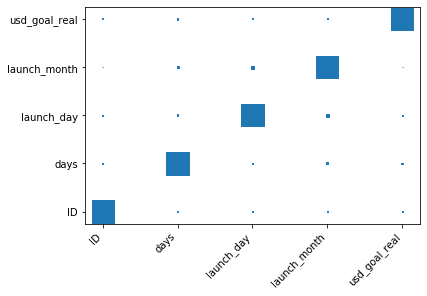

In [40]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

columns = data.columns
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)